In [ ]:
#@title Escolha de um município{run: "auto"}
import random

Escolha o comando=950219#@param{10:"integer"}
random.seed(RA)
codigo=random.randint(0,690)
print("O código do município é ",random.randint(0,644))

O código do município é  625


In [ ]:
import requests
import pandas as pd
districts=requests.get("https://servicodados.ibge.gov.br/api/v1/localidades/estados/35/municipios").json()
districts_df=[municipios['nome'] for municipios in districts]
districts_id=[municipios['id'] for municipios in districts]
data_sp=pd.DataFrame.from_dict({'ID':districts_id,'Municipios':districts_df})
data_sp.iloc[codigo,:]

ID              3529658
Municipios    Mesópolis
Name: 333, dtype: object

In [ ]:
print('Município alvo:\n',data_sp.iloc[codigo,:])

Município alvo:
 ID              3529658
Municipios    Mesópolis
Name: 333, dtype: object


In [ ]:
data_sp

,ID,Municipios
0,3500105,Adamantina
1,3500204,Adolfo
2,3500303,Aguaí
3,3500402,Águas da Prata
4,3500501,Águas de Lindóia
...,...,...
640,3557006,Votorantim
641,3557105,Votuporanga
642,3557154,Zacarias
643,3557204,Chavantes


In [ ]:
url="https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html"
d = pd.read_html(url)
idh=d[0]

In [ ]:
print(idh.columns.ravel())
new = idh["Município"].str.split("(", n=1, expand=True)
idh["Município"] = new[0]
idh["Estado"] = new[1]
idh['Estado']=idh['Estado'].str[:-1]
idh['Município']=idh['Município'].str[:-1]

['Ranking IDHM 2010' 'Município' 'IDHM 2010' 'IDHM Renda 2010'
 'IDHM Longevidade 2010' 'IDHM Educação 2010']


<ipython-input-35-e13a6781577b>:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(idh.columns.ravel())


In [ ]:
idh.head()

,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Estado
0,1 º,São Caetano do Sul,862,0891,0887,811,SP
1,2 º,Águas de São Pedro,854,0849,0890,825,SP
2,3 º,Florianópolis,847,0870,0873,800,SC
3,4 º,Balneário Camboriú,845,0854,0894,789,SC
4,4 º,Vitória,845,0876,0855,805,ES


In [ ]:
final_df=pd.merge(left=data_sp,right=idh, left_on='Municipios',right_on='Município',how='inner')

In [ ]:
final_df

,ID,Municipios,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Estado
0,3500105,Adamantina,67 º,Adamantina,790,0772,0852,750,SP
1,3500204,Adolfo,1021 º,Adolfo,730,0710,0844,648,SP
2,3500303,Aguaí,1454 º,Aguaí,715,0703,0858,606,SP
3,3500402,Águas da Prata,119 º,Águas da Prata,781,0750,0886,716,SP
4,3500501,Águas de Lindóia,648 º,Águas de Lindóia,745,0725,0846,675,SP
...,...,...,...,...,...,...,...,...,...
681,3557006,Votorantim,265 º,Votorantim,767,0720,0838,747,SP
682,3557105,Votuporanga,67 º,Votuporanga,790,0772,0857,744,SP
683,3557154,Zacarias,1052 º,Zacarias,729,0695,0826,674,SP
684,3557204,Chavantes,1052 º,Chavantes,729,0713,0828,655,SP


In [ ]:
final_df.columns, final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     686 non-null    int64 
 1   Municipios             686 non-null    object
 2   Ranking IDHM 2010      686 non-null    object
 3   Município              686 non-null    object
 4   IDHM 2010              686 non-null    int64 
 5   IDHM Renda 2010        686 non-null    object
 6   IDHM Longevidade 2010  686 non-null    object
 7   IDHM Educação 2010     686 non-null    int64 
 8   Estado                 686 non-null    object
dtypes: int64(3), object(6)
memory usage: 53.6+ KB


(Index(['ID', 'Municipios', 'Ranking IDHM 2010', 'Município', 'IDHM 2010',
        'IDHM Renda 2010', 'IDHM Longevidade 2010', 'IDHM Educação 2010',
        'Estado'],
       dtype='object'), None)

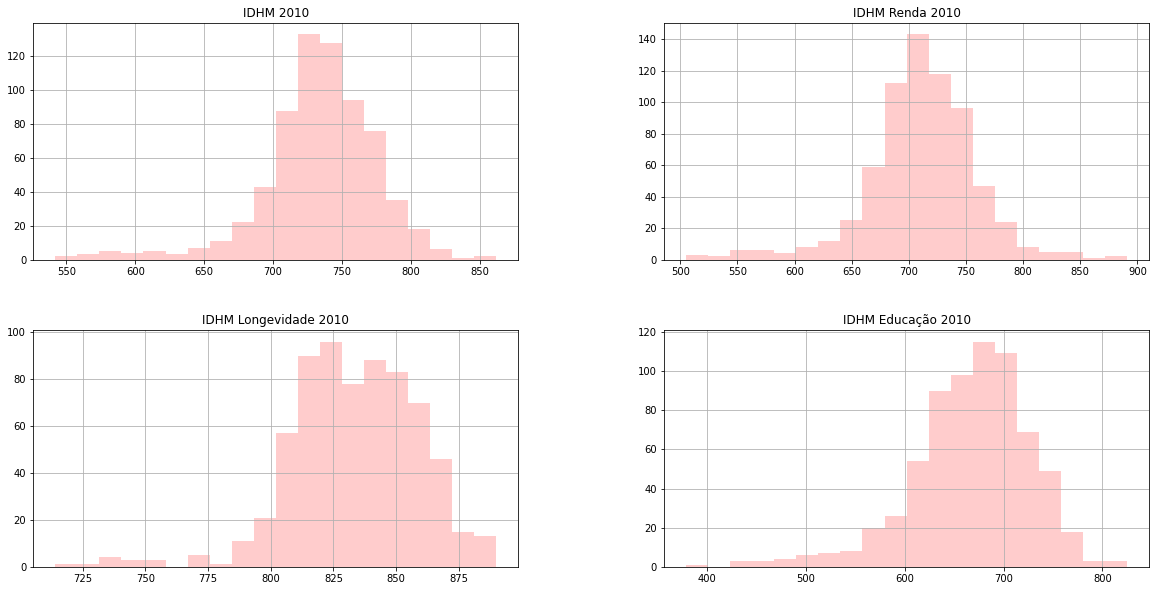

In [ ]:
final_df['IDHM Renda 2010'] = pd.to_numeric(final_df['IDHM Renda 2010'])
final_df['IDHM Longevidade 2010'] = pd.to_numeric(final_df['IDHM Longevidade 2010'])
final_df.hist(column=['IDHM 2010', 'IDHM Renda 2010', 'IDHM Longevidade 2010', 'IDHM Educação 2010'],figsize=(20,10),color='r', alpha=0.2, bins=20);

In [1]:
#@ Em etapas futuras o dataset pode ser integrado ao power BI